#############################################
#  DIABETES: END TO END APPLICATION
#############################################

## Veri Seti Değişkenleri
* **Pregnancies**: Hamilelik sayısı
* **Glucose**: Glikoz düzeyi
* **BloodPressure** : Kan basıncı
* **SkinThickness** : Deri kalınlığı
* **Insulin** : Insülin seviyesi
* **BMI**: [Body Mass Index] Vücut Kitle İndeksi 
* **DiabetesPedigreeFunction** : Diyabet 
* **Age** : Yaş
* **Outcome** :Kişi diyabet hastası mı değil mi ? [Diyabet hastası = 1, diyabet hastası değil = 0]

In [1]:
import numpy as np
import pandas as pd
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 170)
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.000,3.845,3.370,0.000,0.000,1.000,3.000,6.000,9.000,10.000,13.000,17.000
Glucose,768.000,120.895,31.973,0.000,85.000,99.000,117.000,140.250,167.000,181.000,196.000,199.000
BloodPressure,768.000,69.105,19.356,0.000,54.000,62.000,72.000,80.000,88.000,90.000,106.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,0.000,23.000,32.000,40.000,44.000,51.330,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,0.000,30.500,127.250,210.000,293.000,519.900,846.000
BMI,768.000,31.993,7.884,0.000,23.600,27.300,32.000,36.600,41.500,44.395,50.759,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.165,0.244,0.372,0.626,0.879,1.133,1.698,2.420
Age,768.000,33.241,11.760,21.000,22.000,24.000,29.000,41.000,51.000,58.000,67.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print("There are {} observation and {} features "
      .format(df.shape[0], df.shape[1]))

There are 768 observation and 9 features 


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 Veri setindeki bazı değerler için 0 girilmiş. Bunun münkün olmadığı değişkenler de var.               
* Glucose                      
* BloodPressure                
* SkinThickness               
* Insulin                     
* BMI                              

Bu değişkenler için 0 olarak gözüken değerleri eksik gözlem olarak alabiliriz.

##### Kaç adet 0 var ?

In [7]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

##### 0 değerlerinin NA olarak değiştirilmesi.

In [8]:
df[['Glucose','BloodPressure','SkinThickness',
        'Insulin','BMI',]] = df[['Glucose','BloodPressure',
                             'SkinThickness','Insulin','BMI',]].replace(0,np.NaN)

######################
**MISSING VALUES**
######################

In [9]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    
# Plotting 
missing_plot(df, 'Outcome')

**Missing values:**

* Insulin = 48.7% - 374
* SkinThickness = 29.56% - 227
* BloodPressure = 4.56% - 35
* BMI = 1.43% - 11
* Glucose = 0.65% - 5


In [10]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

## Data Visualization

Negative (0):  500
Positive (1):  268


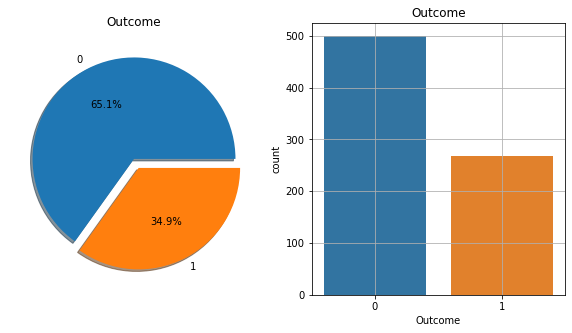

In [12]:
f,ax = plt.subplots(1,2,figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow = True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
N,P = df['Outcome'].value_counts()
print('Negative (0): ' ,N)
print('Positive (1): ' ,P)
plt.grid()
plt.show()

## Histogram

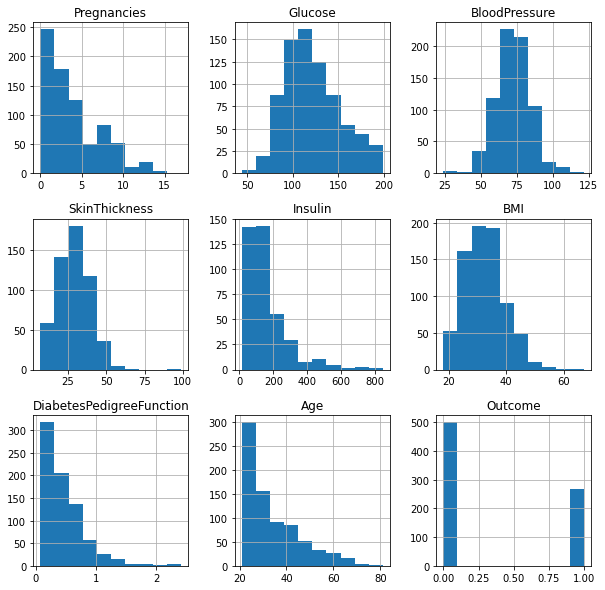

In [13]:
df.hist(bins = 10, figsize=(10,10))
plt.show()

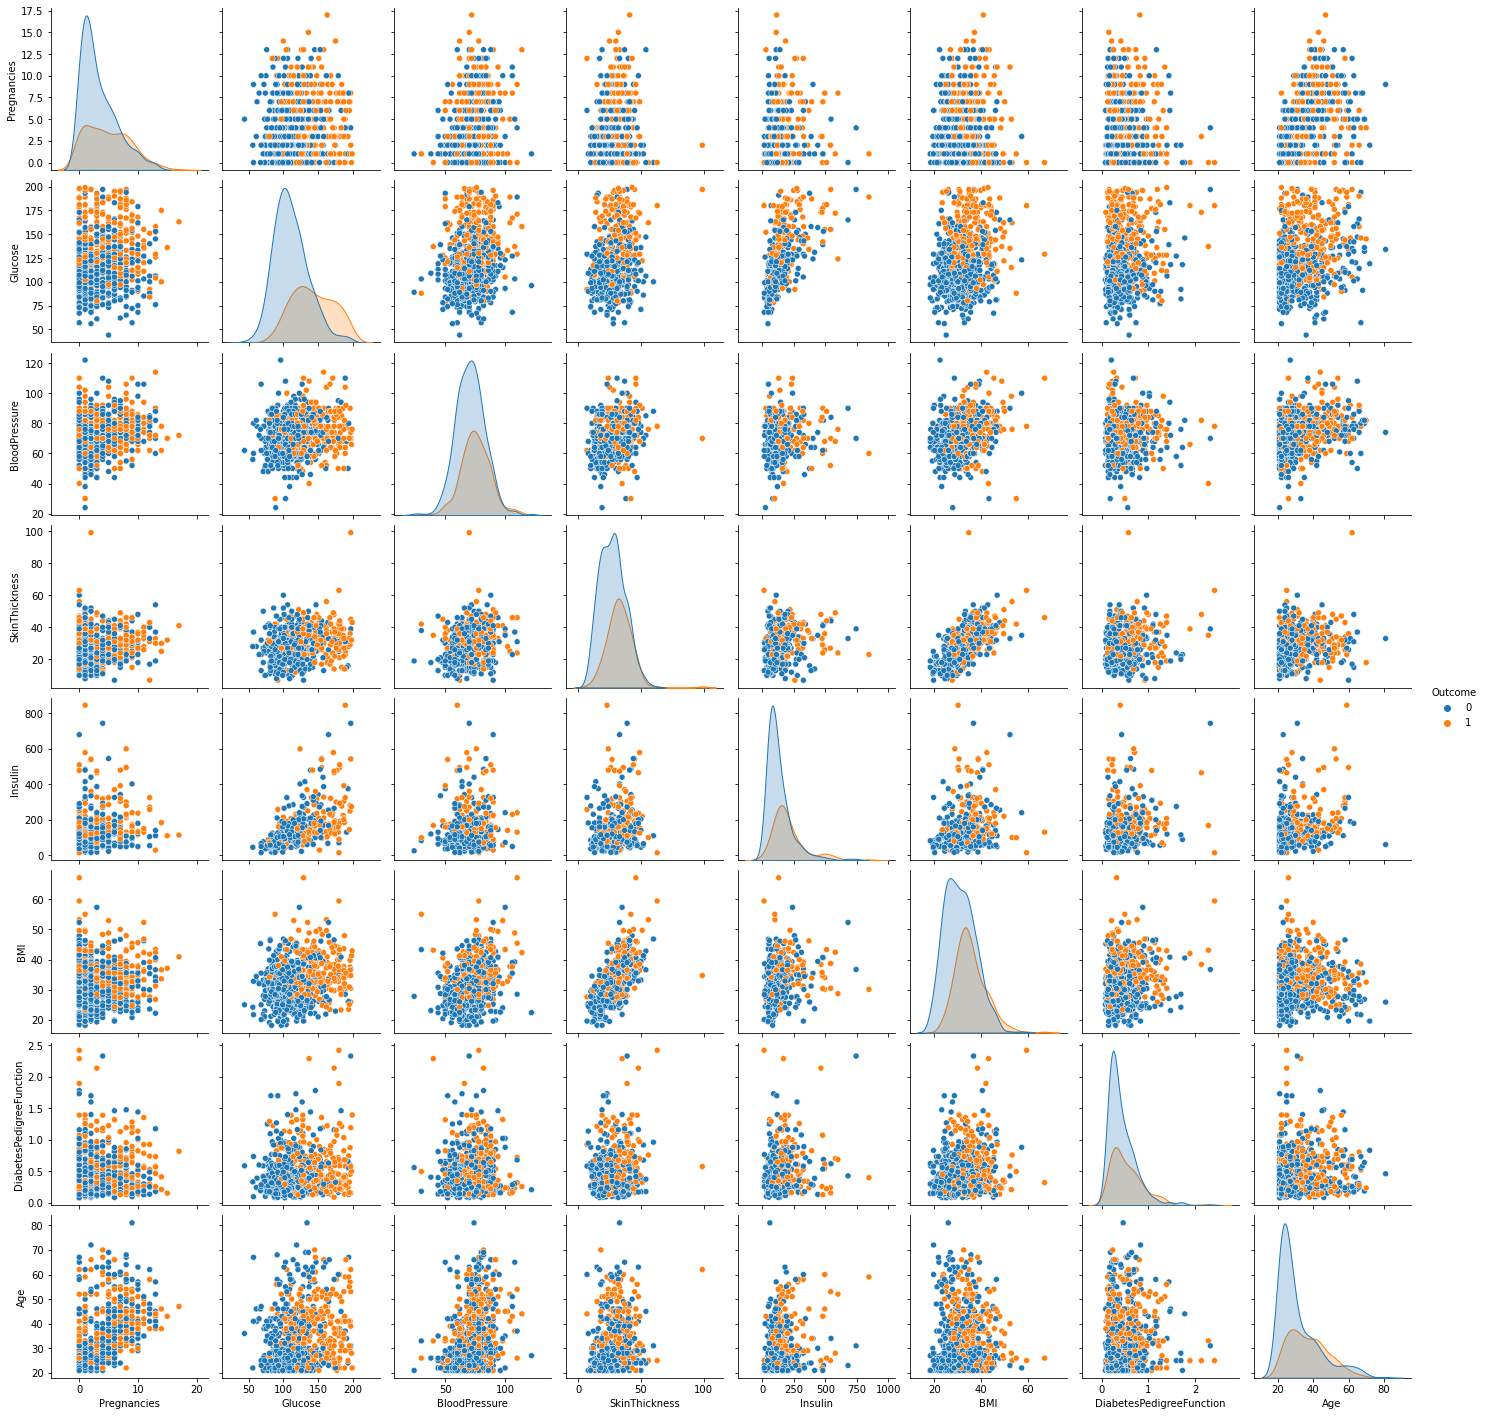

In [15]:
sns.pairplot(data = df, hue='Outcome')
plt.show()

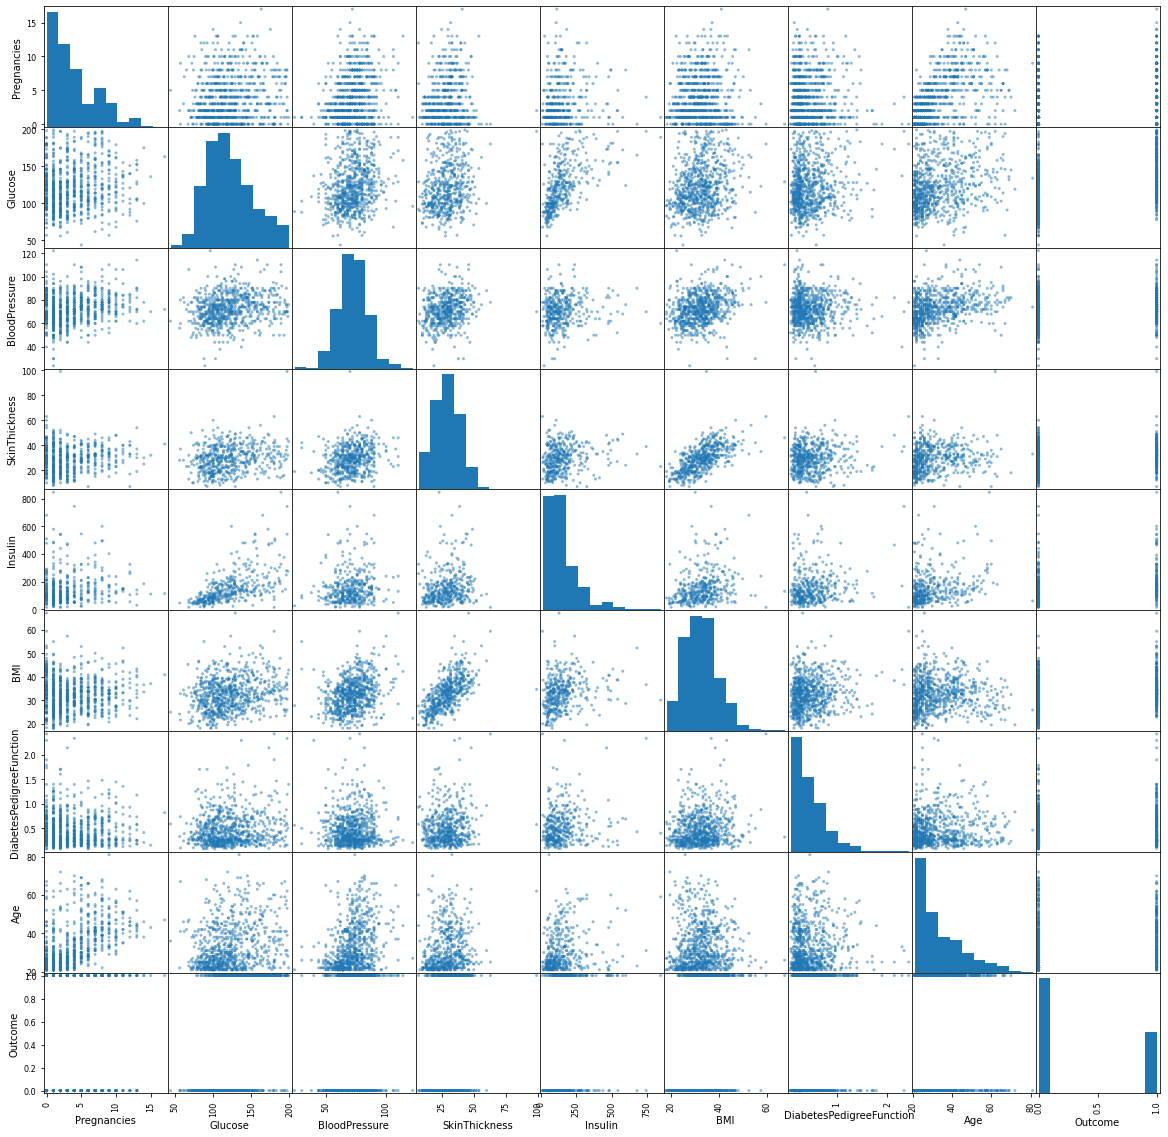

In [14]:
scatter_matrix(df, figsize = (20,20));

## Correlation Analysis
Correlation is the measure of the relationship between two variables.

In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.128,0.214,0.100,0.082,0.022,-0.034,0.544,0.222
Glucose,0.128,1.000,0.223,0.228,0.581,0.233,0.137,0.267,0.495
BloodPressure,0.214,0.223,1.000,0.227,0.098,0.289,-0.003,0.330,0.171
SkinThickness,0.100,0.228,0.227,1.000,0.185,0.648,0.115,0.167,0.259
Insulin,0.082,0.581,0.098,0.185,1.000,0.228,0.130,0.220,0.303
BMI,0.022,0.233,0.289,0.648,0.228,1.000,0.155,0.026,0.314
DiabetesPedigreeFunction,-0.034,0.137,-0.003,0.115,0.130,0.155,1.000,0.034,0.174
Age,0.544,0.267,0.330,0.167,0.220,0.026,0.034,1.000,0.238
Outcome,0.222,0.495,0.171,0.259,0.303,0.314,0.174,0.238,1.000


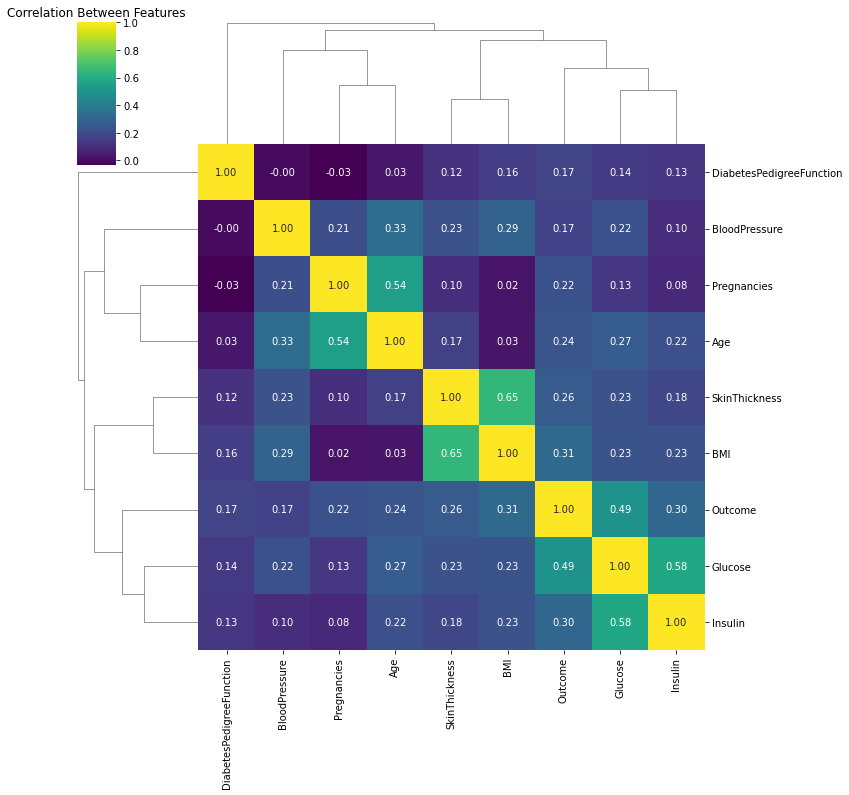

In [14]:
corr_matrix = df.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f", cmap = "viridis", figsize=(11,11))
plt.title("Correlation Between Features")
plt.show()

## Feature Extraction

* WHO defines 'Adolescents' as individuals in the 10-19 years age group and 'Youth' as the 15-24 year age group. While 'Young People' covers the age range 10-24 years.

In [15]:
df.loc[(df["Age"] < 25), "NEW_AGE_CAT"] = "young"
df.loc[(df["Age"] >= 25) & (df["Age"] <= 55), "NEW_AGE_CAT"] = "mature"
df.loc[(df["Age"] > 55), "NEW_AGE_CAT"] = "senior"

    BMI	             Weight Status
    Below 18.5	     Underweight
    18.5 – 24.9	     Normal or Healthy Weight
    25.0 – 29.9	     Overweight
    30.0 and Above   Obese

In [16]:
df.loc[(df['BMI'] < 18), "Weight"] = "Underweight"
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] <= 24.9), 'Weight'] = 'Normal'
df.loc[(df['BMI'] >= 25) & (df['BMI'] < 30), 'Weight'] = 'Overweight'
df.loc[(df['BMI'] >= 30), 'Weight'] = 'Obese'

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   NEW_AGE_CAT               768 non-null    object 
 10  Weight                    753 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 66.1+ KB


In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,Weight
0,6,148.000,72.000,35.000,nan,33.600,0.627,50,1,mature,Obese
1,1,85.000,66.000,29.000,nan,26.600,0.351,31,0,mature,Overweight
2,8,183.000,64.000,nan,nan,23.300,0.672,32,1,mature,Normal
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,Overweight
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,Obese


* A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes.

In [19]:
df.loc[(df['Glucose'] < 140), "Sugar Risk"] = "Normal"
df.loc[(df['Glucose'] >= 140) & (df['Glucose'] <= 190), 'Sugar Risk'] = 'Risky'
df.loc[(df['Glucose'] >= 199), 'Sugar Risk'] = 'Dangerous'

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   NEW_AGE_CAT               768 non-null    object 
 10  Weight                    753 non-null    object 
 11  Sugar Risk                747 non-null    object 
dtypes: float64(6), int64(3), object(3)
memory usage: 72.1+ KB


In [24]:
df.shape

(768, 12)

In [21]:
df.dropna(inplace=True)

In [26]:
df.shape

(383, 12)

In [27]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,Weight,Sugar Risk
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,Overweight,Normal
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,Obese,Normal
6,3,78.000,50.000,32.000,88.000,31.000,0.248,26,1,mature,Obese,Normal
13,1,189.000,60.000,23.000,846.000,30.100,0.398,59,1,senior,Obese,Risky
14,5,166.000,72.000,19.000,175.000,25.800,0.587,51,1,mature,Overweight,Risky


######################
**ONE HOT ENCODING**
######################

In [22]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [23]:
ohe_cols = [col for col in df.columns if 10 >= len(df[col].unique()) > 1 and col != 'Outcome']
df = one_hot_encoder(df, ohe_cols)
df.columns = [col.upper() for col in df.columns]

In [24]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT_MATURE,NEW_AGE_CAT_SENIOR,NEW_AGE_CAT_YOUNG,WEIGHT_NORMAL,WEIGHT_OBESE,WEIGHT_OVERWEIGHT,SUGAR RISK_NORMAL,SUGAR RISK_RISKY
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,0,0,1,0,0,1,1,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,1,0,0,0,1,0,1,0
6,3,78.000,50.000,32.000,88.000,31.000,0.248,26,1,1,0,0,0,1,0,1,0
13,1,189.000,60.000,23.000,846.000,30.100,0.398,59,1,0,1,0,0,1,0,0,1
14,5,166.000,72.000,19.000,175.000,25.800,0.587,51,1,1,0,0,0,0,1,0,1


######################
**OUTLIERS**
######################

In [25]:
def replace_with_thresholds(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if low_limit > 0:
        dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
    else:
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [26]:
def outlier_thresholds(dataframe, col_name):
    quartile1 = dataframe[col_name].quantile(0.05)
    quartile3 = dataframe[col_name].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [27]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col != 'Outcome']

for col in num_cols:
        replace_with_thresholds(df, col)

In [28]:
df.shape

(383, 17)

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PREGNANCIES,383.000,3.308,3.223,0.000,1.000,2.000,5.000,17.000
GLUCOSE,383.000,121.175,29.327,56.000,99.000,119.000,141.500,189.000
BLOODPRESSURE,383.000,70.731,12.584,24.000,62.000,70.000,78.000,110.000
SKINTHICKNESS,383.000,29.141,10.529,7.000,21.000,29.000,37.000,63.000
INSULIN,383.000,152.355,113.597,14.000,76.000,125.000,186.500,846.000
BMI,383.000,33.126,7.025,19.300,28.400,33.200,37.100,67.100
DIABETESPEDIGREEFUNCTION,383.000,0.520,0.335,0.085,0.269,0.447,0.687,2.420
AGE,383.000,30.723,10.073,21.000,23.000,27.000,36.000,81.000
OUTCOME,383.000,0.326,0.469,0.000,0.000,0.000,1.000,1.000
NEW_AGE_CAT_MATURE,383.000,0.621,0.486,0.000,0.000,1.000,1.000,1.000


######################
**MODEL**
######################

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

y = df["OUTCOME"]
X = df.drop(["OUTCOME"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=46)
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7792207792207793

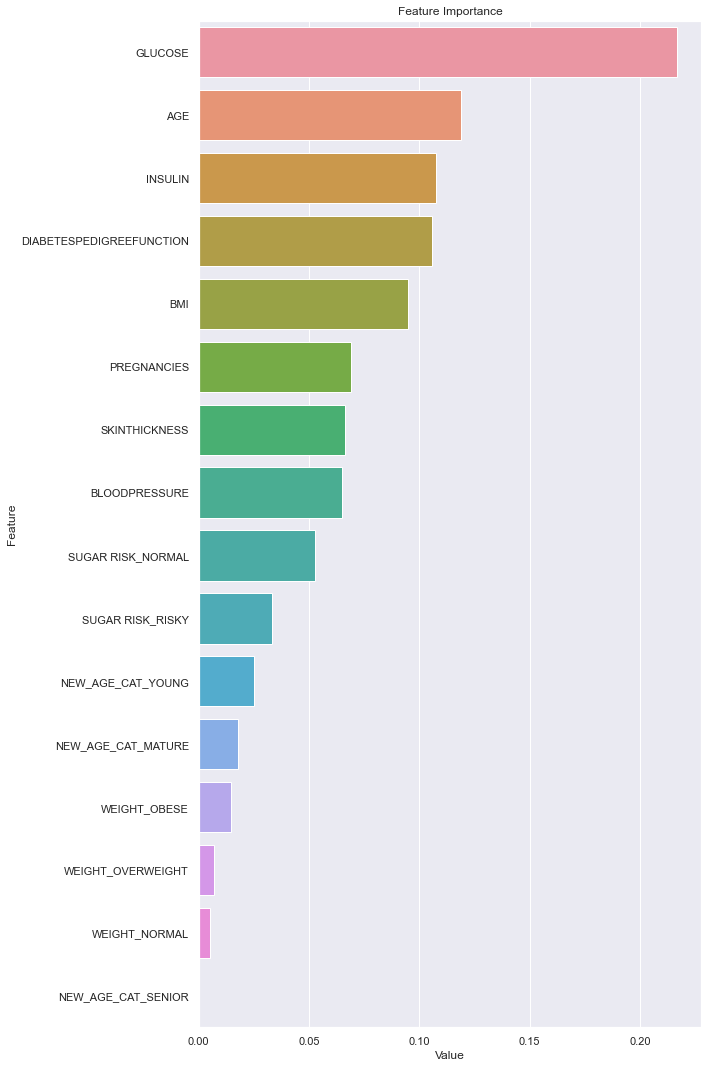

In [31]:
def plot_importance(model, X, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': X.columns})
    plt.figure(figsize=(10, 15))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.savefig('importances-01.png')
    plt.show()
plot_importance(rf_model, X)